In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerias necearias

In [46]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
#from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Librería para manejo de datos
import pandas as pd

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#1. Preparando los datos

In [47]:
data = pd.read_csv('/content/drive/MyDrive/SIS420-IA/LAB03_clasificacion/bots_vs_users.csv')
data

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,target,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,has_interests,has_books,has_tv,has_quotes,has_about,has_games,has_movies,has_activities,has_music,can_add_as_friend,can_invite_to_group,subscribers_count,is_blacklisted,has_career,has_military_service,has_hometown,marital_status,has_universities,has_schools,has_relatives,is_verified,is_confirmed,has_status,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,0.0,1.0,0,0.0,Unknown,1.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Un

Peparamos el DATASET

In [48]:
print('INFORMACIÓN DE TIPO DE DATOS')
data.info()

print('\nDATOS VACÍOS')
print(pd.isnull(data).sum())

INFORMACIÓN DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_

Descataremos columnas que no son necesarias para el analisis o que tienen muchos datos perdidos

In [49]:
data = data[['has_photo', 'can_send_message', 'is_profile_closed',
             'subscribers_count', 'posts_count', 'avg_likes', 'avg_comments',
             'avg_views', 'posting_frequency_days', 'avg_text_uniqueness', 'target']]

In [6]:
#print(data.corr()['target'].sort_values(ascending=False))

In [7]:
#print(data[['has_photo', 'can_send_message', 'is_profile_closed', 'target']].corr()['target'])

In [8]:
#print(data['has_photo'].value_counts(normalize=True))
#print(data['can_send_message'].value_counts(normalize=True))
#print(data['is_profile_closed'].value_counts(normalize=True))

In [9]:
#Imprimimos los datos para ver que se hayan eliminado las columnas
data

,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness,target
0,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,0.0,1.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0
5870,1.0,0.0,1.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0
5871,0.0,0.0,0.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0
5872,1.0,0.0,0.0,778.0,NaN,NaN,NaN,NaN,NaN,NaN,0


Vamos a convertir "Unknown" en NaN en  y luego convertir toda la columna a número:

In [50]:
data['subscribers_count'] = pd.to_numeric(data['subscribers_count'].replace('Unknown', np.nan))

/tmp/ipython-input-59242158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subscribers_count'] = pd.to_numeric(data['subscribers_count'].replace('Unknown', np.nan))


In [51]:
#Mostramos los datos convetidos
data

,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness,target
0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5870,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5871,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5872,1.0,0.0,0.0,778.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [52]:
print(data.dtypes)

has_photo                  object
can_send_message           object
is_profile_closed          object
subscribers_count         float64
posts_count               float64
avg_likes                 float64
avg_comments              float64
avg_views                 float64
posting_frequency_days    float64
avg_text_uniqueness       float64
target                      int64
dtype: object


#CONVERTIMOS LOS TIPOS DE DATOS
convetiresmos las tipos de los datos de decir de tipo object a valores booleanos

In [53]:
data['has_photo'] = data['has_photo'].apply(lambda x: 1 if str(x).strip().lower() == 'true' else 0)
data['can_send_message'] = data['can_send_message'].apply(lambda x: 1 if str(x).strip().lower() == 'true' else 0)
data['is_profile_closed'] = data['is_profile_closed'].apply(lambda x: 1 if str(x).strip().lower() == 'true' else 0)

/tmp/ipython-input-3975295969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_photo'] = data['has_photo'].apply(lambda x: 1 if str(x).strip().lower() == 'true' else 0)
/tmp/ipython-input-3975295969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['can_send_message'] = data['can_send_message'].apply(lambda x: 1 if str(x).strip().lower() == 'true' else 0)
/tmp/ipython-input-3975295969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [14]:
#print(data.dtypes)

In [15]:
#data

#Reemplazar los Nulos con el promedio de cada columna

In [54]:
# Reemplazar nulos con el promedio de cada columna
for col in ['subscribers_count', 'posts_count', 'avg_likes', 'avg_comments',
            'avg_views', 'posting_frequency_days', 'avg_text_uniqueness']:
    data[col] = data[col].fillna(data[col].mean())

/tmp/ipython-input-2172640083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mean())


In [55]:
#Mostramos los datos ya reemplazados
data

,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness,target
0,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,1
1,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,1
2,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,1
3,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,1
4,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,1
...,...,...,...,...,...,...,...,...,...,...,...
5869,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,0
5870,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,0
5871,0,0,0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,0
5872,0,0,0,778.000000,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009,0


#Separa los datos en Variables Dependientes e Independientes

#Variables Dependientes:
target (objetivo)

#Variables Independientes:
has_photo (Si tiene foto de perfil (convertible a binaria)

can_send_message (Si puede enviar mensajes (binaria))

is_profile_closed (Si el perfil está cerrado (binaria)

subscribers_count (Número de suscriptores (convertir a numérica))

posts_count (Número de publicaciones)
avg_likes (Promedio de likes por publicación)

avg_comments (Promedio de comentarios)

avg_views (Promedio de vistas)

posting_frequency_days (Frecuencia de publicación en días)

avg_text_uniqueness (Originalidad del texto)

In [56]:
X = data[['has_photo', 'can_send_message', 'is_profile_closed',
          'subscribers_count', 'posts_count', 'avg_likes', 'avg_comments',
          'avg_views', 'posting_frequency_days', 'avg_text_uniqueness']]

y = data['target']

In [57]:
#Imprimimos X
print(X)

      has_photo  can_send_message  is_profile_closed  subscribers_count  \
0             0                 0                  0        1730.940769   
1             0                 0                  0        1730.940769   
2             0                 0                  0        1730.940769   
3             0                 0                  0        1730.940769   
4             0                 0                  0        1730.940769   
...         ...               ...                ...                ...   
5869          0                 0                  0        1730.940769   
5870          0                 0                  0        1730.940769   
5871          0                 0                  0        1730.940769   
5872          0                 0                  0         778.000000   
5873          0                 0                  0        4136.000000   

      posts_count  avg_likes  avg_comments   avg_views  \
0       18.629044  19.552487      0.61081

In [58]:
#Imprimimos
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5869    0
5870    0
5871    0
5872    0
5873    0
Name: target, Length: 5874, dtype: int64


#Dividimos el dataset: 20 % para pruebas y 80 % para entrenamiento

In [59]:
# Dividir el dataset completo
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividir los datos para prueba
X_test = test_data.iloc[:, :10]   # Columnas 0 a 9 (10 columnas predictoras)
y_test = test_data.iloc[:, 10]    # Columna 10 (target)

# Dividir los datos para entrenamiento
X_train = train_data.iloc[:, :10]
y_train = train_data.iloc[:, 10]

# Tamaño del conjunto de entrenamiento
m = y_train.size

# Mostrar datos
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

print('-' * 80)
print("El 80% de ejemplos que serán para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que serán para el test son: {:.0f}".format(len(test_data)))

Datos de X_train:
      has_photo  can_send_message  is_profile_closed  subscribers_count  \
3686          0                 0                  0        1730.940769   
4618          0                 0                  0        1730.940769   
3455          0                 0                  0        3608.000000   
5347          0                 0                  0        4953.000000   
3523          0                 0                  0        1730.940769   
...         ...               ...                ...                ...   
3772          0                 0                  0         647.000000   
5191          0                 0                  0         207.000000   
5226          0                 0                  0         296.000000   
5390          0                 0                  0          81.000000   
860           0                 0                  0        1730.940769   

      posts_count  avg_likes  avg_comments    avg_views  \
3686    18.629044  19.

#2. Implementacion de la regresion logistica
Se llama a la función implementada para mostrar los datos cargados:
Conjunto de datos con perfiles sociales que contienen información sobre actividad, interacción y configuración de cuenta. En esta parte del ejercicio, se creará un modelo de regresión logística para predecir si un perfil cumple con una condición específica (por ejemplo, si es legítimo, si genera interacción, etc.), representada por la variable target.

Para cada perfil se utilizarán registros que serán evaluados en el transcurso del proceso

#FUNCION DE NORMALIZACION

In [60]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los Datos

In [61]:
X_norm, mu, sigma = featureNormalize(X_train)

Mostramos los datos normalizados

In [62]:
X_norm

,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness
3686,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
4618,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
3455,0.0,0.0,0.0,0.951668,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
5347,0.0,0.0,0.0,1.623362,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
3523,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
...,...,...,...,...,...,...,...,...,...,...
3772,0.0,0.0,0.0,-0.527056,-8.271678,2.340841,-0.770806,0.694353,24.190477,-5.951759
5191,0.0,0.0,0.0,-0.746792,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
5226,0.0,0.0,0.0,-0.702346,0.669600,-1.094544,-0.577348,-0.742141,0.653476,-0.701657
5390,0.0,0.0,0.0,-0.809717,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499


In [63]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 4699
n (número de columnas): 10


Agregamos una columna de unos

In [64]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [65]:
X_ready

array([[ 1.        ,  0.        ,  0.        , ...,  0.00456377,
         0.00734558, -0.00749935],
       [ 1.        ,  0.        ,  0.        , ...,  0.00456377,
         0.00734558, -0.00749935],
       [ 1.        ,  0.        ,  0.        , ...,  0.00456377,
         0.00734558, -0.00749935],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.74214103,
         0.65347565, -0.70165739],
       [ 1.        ,  0.        ,  0.        , ...,  0.00456377,
         0.00734558, -0.00749935],
       [ 1.        ,  0.        ,  0.        , ...,  0.00456377,
         0.00734558, -0.00749935]])

#Definimos la Funcion Sigmoidea
la funcion sigmoidea o tambien llama funcion de logistica, nos permite calcular o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpuesta de theta por X, que es nuestra hipotesis

In [28]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmide aplicando la funcion sigmoid con z=0, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de z

In [29]:
# Prueba la implementacion de la funcion sigmoid
print(sigmoid(0))

0.5


In [30]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


#Funcion de Costo y Gradiente
se implementa la funcion de cost y gradient, para la regresion logistica. Antes de continuar es importante agregar el termino de intercepcion a X

In [31]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [32]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [33]:
from matplotlib import pyplot

theta calculado por el descenso por el gradiente: [-0.03391484  0.          0.          0.         -0.24032441  0.04331716
 -0.31904304  0.00488518 -0.08477412 -0.39184157 -0.21931346]


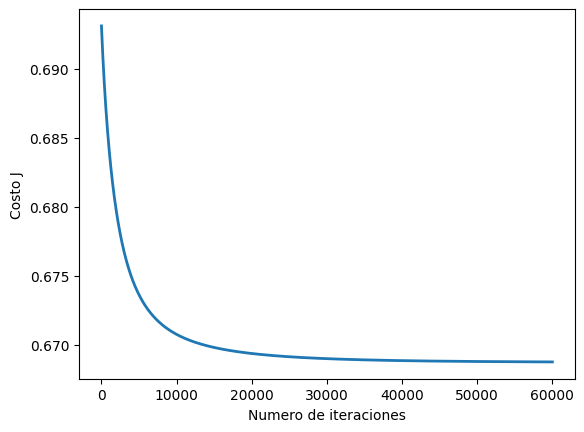

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 60000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [35]:
print(f"Con un costo de: { J_history[-1]} ")

Con un costo de: 0.6687445041441828 


Ahora realizamos una pruebas para ver si el perfil es un boot o no lo es

#3. TEST de validacion
Haremos las pruebas del rendimiento del modelo con 20% de los datos

In [36]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness
5365,0.0,0.0,0.0,0.840302,0.669600,-0.885697,-0.770806,-0.438279,-0.546786,1.256008
4325,0.0,0.0,0.0,-0.832190,-7.774941,-1.150237,-0.770806,-0.501338,-0.932933,0.010221
199,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
3259,0.0,0.0,0.0,0.014264,0.669600,-0.595127,0.325458,-0.583730,-0.898628,0.900069
3493,0.0,0.0,0.0,-0.085586,0.669600,-0.922018,-0.770806,-0.471418,-0.614262,-5.061912
...,...,...,...,...,...,...,...,...,...,...
4486,0.0,0.0,0.0,-0.556521,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
693,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
2559,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499
2029,0.0,0.0,0.0,0.014264,-0.011405,0.013405,0.016972,0.004564,0.007346,-0.007499


Concatenamos con una columna de uno a la izquierda

In [37]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.          0.          0.         ... -0.4382795  -0.54678566
   1.25600775]
 [ 1.          0.          0.         ... -0.50133763 -0.93293327
   0.01022084]
 [ 1.          0.          0.         ...  0.00456377  0.00734558
  -0.00749935]
 ...
 [ 1.          0.          0.         ...  0.00456377  0.00734558
  -0.00749935]
 [ 1.          0.          0.         ...  0.00456377  0.00734558
  -0.00749935]
 [ 1.          0.          0.         ...  0.00456377  0.00734558
  -0.00749935]]


In [38]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [39]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de victoria %'])
df_pred['Probabilidad de victoria %'] = df_pred['Probabilidad de victoria %'].abs()

In [40]:
pd.set_option('display.max_columns', None)

#preparar una tabla final que combine los datos reales, las predicciones y las variables originale

In [41]:

X_columans = ['has_photo', 'can_send_message', 'is_profile_closed',
          'subscribers_count', 'posts_count', 'avg_likes', 'avg_comments',
          'avg_views', 'posting_frequency_days', 'avg_text_uniqueness']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(200)

,Valores del Y Reales,Probabilidad de victoria %,has_photo,can_send_message,is_profile_closed,subscribers_count,posts_count,avg_likes,avg_comments,avg_views,posting_frequency_days,avg_text_uniqueness
0,0,51.197369,0.0,0.0,0.0,3385.000000,20.000000,4.700000,0.000000,277.050000,27.240000,0.810000
1,0,64.527249,0.0,0.0,0.0,36.000000,3.000000,0.330000,0.000000,227.670000,0.000000,0.670000
2,1,48.908895,0.0,0.0,0.0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009
3,0,59.564006,0.0,0.0,0.0,1730.940769,20.000000,9.500000,0.850000,163.150000,2.420000,0.770000
4,0,84.512414,0.0,0.0,0.0,1531.000000,20.000000,4.100000,0.000000,251.100000,22.480000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,48.908895,0.0,0.0,0.0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009
196,0,48.908895,0.0,0.0,0.0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009
197,1,48.908895,0.0,0.0,0.0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009
198,1,48.908895,0.0,0.0,0.0,1730.940769,18.629044,19.552487,0.610812,623.834788,66.330065,0.668009


#Presicion de nuestro modelo de regresion logistica
Usaremos el metodo np.mean (promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritmeticas, la media resultante sera la proporcion de los elementos iguales en y_predicha e y_test

In [42]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [43]:
# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))

Precisión de entrenamiento: 35.49 % 


In [44]:
print(y_train.value_counts(normalize=True))

target
0    0.502873
1    0.497127
Name: proportion, dtype: float64


In [45]:
print(data.corr()['target'].sort_values(ascending=False))

target                    1.000000
posts_count               0.017408
avg_comments             -0.052538
avg_text_uniqueness      -0.066598
posting_frequency_days   -0.073396
avg_views                -0.082098
avg_likes                -0.099149
subscribers_count        -0.109384
has_photo                      NaN
can_send_message               NaN
is_profile_closed              NaN
Name: target, dtype: float64
